[0 0 0 ... 0 0 0]


<Figure size 640x480 with 0 Axes>

(581, 668, 3)
(388108, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


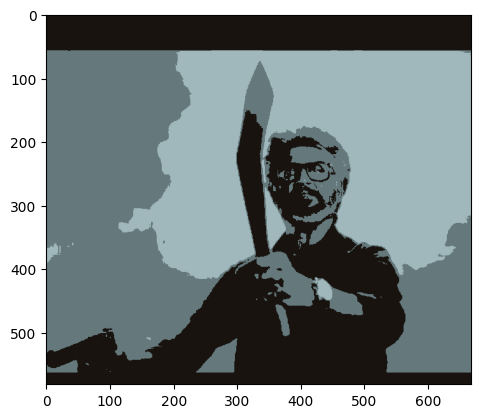

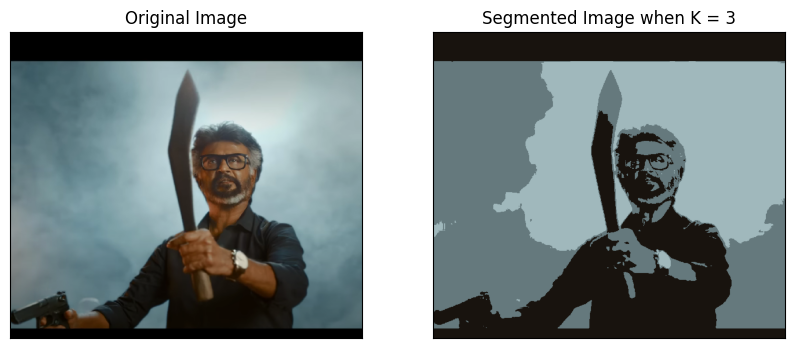

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2

filepath = "/content/Screenshot 2023-08-02 191729.png"
img = cv2.imread(filepath)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
print(r)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()
print(img.shape)

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized.shape)
print(vectorized)


#OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K=3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.imshow(result_image)
plt.show()
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()